In [1]:
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [2]:
df_train.shape


(421570, 5)

In [3]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
df_train.describe()


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
# Date column ko datetime me convert karna
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [6]:
df_train = df_train.sort_values(by="Date")

df_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
277665,29,5,2010-02-05,15552.08,False
277808,29,6,2010-02-05,3200.22,False
277951,29,7,2010-02-05,10820.05,False
278094,29,8,2010-02-05,20055.64,False


In [7]:
df_train.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
!pip install seaborn


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


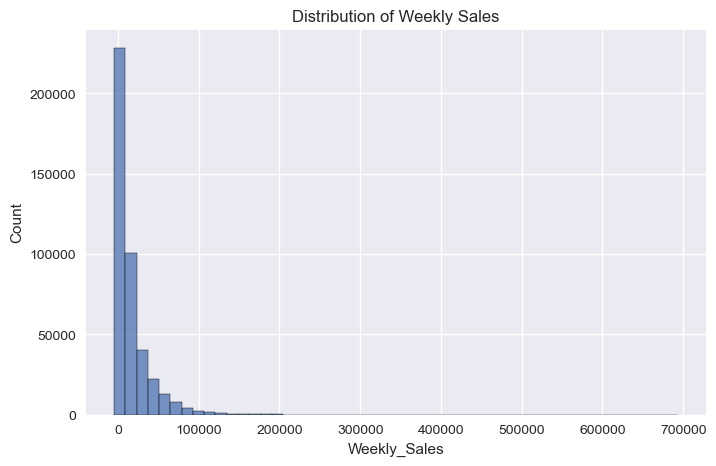

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df_train['Weekly_Sales'], bins=50)
plt.title("Distribution of Weekly Sales")
plt.show()


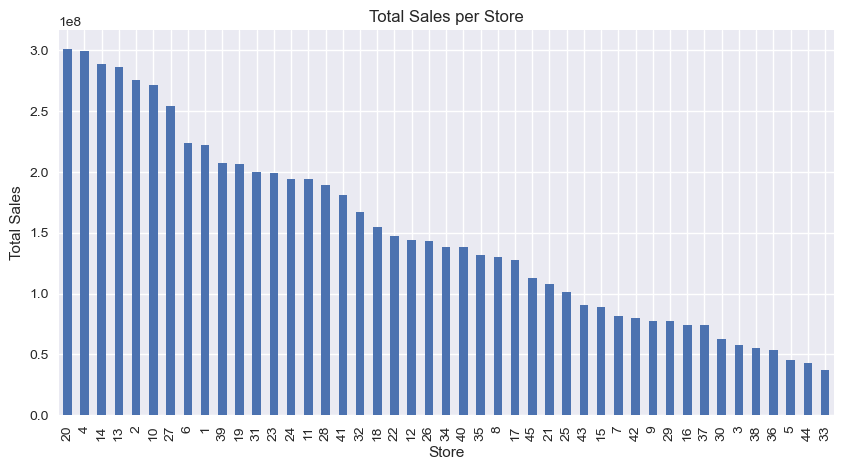

In [11]:
store_sales = df_train.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
store_sales.plot(kind='bar')
plt.title("Total Sales per Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


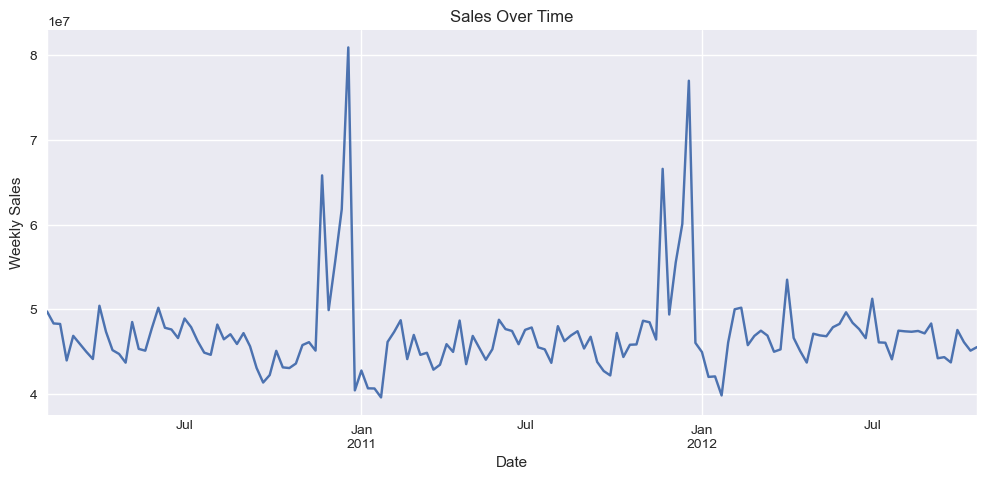

In [12]:
daily_sales = df_train.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


In [13]:
df_features = pd.read_csv("../data/features.csv")
df_stores = pd.read_csv("../data/stores.csv")

df_features.head(), df_stores.head()


(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  2010-02-05        42.31       2.572        NaN        NaN   
 1      1  2010-02-12        38.51       2.548        NaN        NaN   
 2      1  2010-02-19        39.93       2.514        NaN        NaN   
 3      1  2010-02-26        46.63       2.561        NaN        NaN   
 4      1  2010-03-05        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143         8.106      False  ,
    Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863


In [14]:
df_features['Date'] = pd.to_datetime(df_features['Date'])


In [15]:
df_merged = pd.merge(df_train, df_features, on=['Store','Date'], how='left')
df_merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,29,5,2010-02-05,15552.08,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
2,29,6,2010-02-05,3200.22,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
3,29,7,2010-02-05,10820.05,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False
4,29,8,2010-02-05,20055.64,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False


In [16]:
df_merged = pd.merge(df_merged, df_stores, on='Store', how='left')
df_merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,29,5,2010-02-05,15552.08,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False,B,93638
2,29,6,2010-02-05,3200.22,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False,B,93638
3,29,7,2010-02-05,10820.05,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False,B,93638
4,29,8,2010-02-05,20055.64,False,24.36,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,10.064,False,B,93638


In [17]:
df_merged.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [18]:
df_merged[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = \
df_merged[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)


In [19]:
df_merged.isnull().sum()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [20]:
df_merged['Year'] = df_merged['Date'].dt.year
df_merged['Month'] = df_merged['Date'].dt.month
df_merged['Week'] = df_merged['Date'].dt.isocalendar().week
df_merged['Day'] = df_merged['Date'].dt.day
df_merged['DayOfWeek'] = df_merged['Date'].dt.dayofweek


In [21]:
df_merged['IsWeekend'] = df_merged['DayOfWeek'].apply(lambda x: 1 if x>=5 else 0)


In [22]:
df_merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day,DayOfWeek,IsWeekend
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,8.106,False,A,151315,2010,2,5,5,4,0
1,29,5,2010-02-05,15552.08,False,24.36,2.788,0.0,0.0,0.0,...,10.064,False,B,93638,2010,2,5,5,4,0
2,29,6,2010-02-05,3200.22,False,24.36,2.788,0.0,0.0,0.0,...,10.064,False,B,93638,2010,2,5,5,4,0
3,29,7,2010-02-05,10820.05,False,24.36,2.788,0.0,0.0,0.0,...,10.064,False,B,93638,2010,2,5,5,4,0
4,29,8,2010-02-05,20055.64,False,24.36,2.788,0.0,0.0,0.0,...,10.064,False,B,93638,2010,2,5,5,4,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
le = LabelEncoder()
df_merged['Type'] = le.fit_transform(df_merged['Type'])


In [25]:
# Target
y = df_merged['Weekly_Sales']

# Features
X = df_merged.drop(['Weekly_Sales', 'Date'], axis=1)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.7440320019624218
RMSE: 11537.051339586353


C:\Users\Sarika panchalwar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


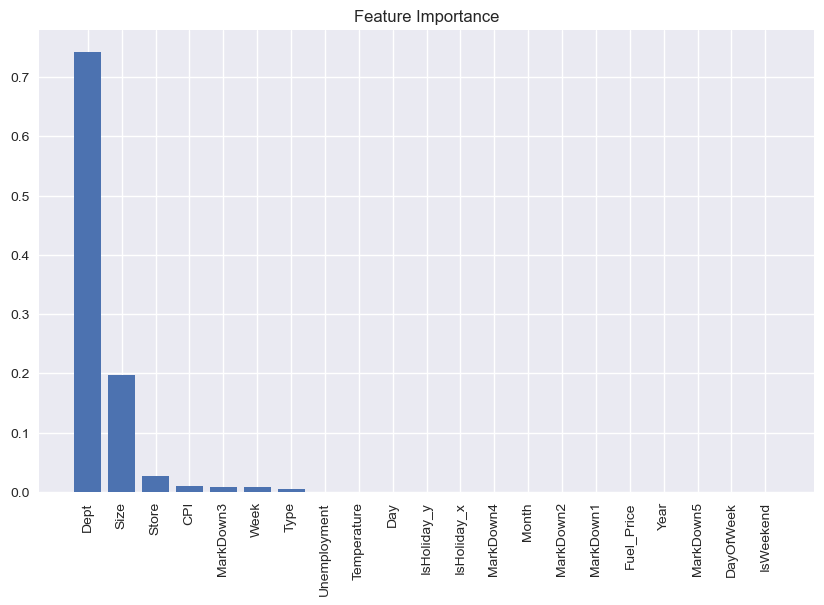

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()


In [31]:
df_merged['Date'].max()


Timestamp('2012-10-26 00:00:00')

In [32]:
import pandas as pd

# future 12 weeks
future_dates = pd.date_range(start=df_merged['Date'].max(), periods=13, freq='W')[1:]
future_dates


DatetimeIndex(['2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09', '2012-12-16', '2012-12-23',
               '2012-12-30', '2013-01-06', '2013-01-13', '2013-01-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [33]:
future_df = pd.DataFrame({
    'Date': future_dates,
    'Store': 1,
    'Dept': 1,
})


In [34]:
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Week'] = future_df['Date'].dt.isocalendar().week
future_df['Day'] = future_df['Date'].dt.day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['IsWeekend'] = future_df['DayOfWeek'].apply(lambda x: 1 if x>=5 else 0)


In [35]:
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
            'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5',
            'Size','Type','IsHoliday_x','IsHoliday_y']:
    future_df[col] = df_merged[col].mean()


In [36]:
X_future = future_df[X.columns]


In [37]:
future_predictions = model.predict(X_future)
future_predictions


array([25550.52650177, 25550.52650177, 25550.52650177, 30338.2812199 ,
       29878.75654978, 31482.07412455, 34850.3644515 , 35309.88912161,
       34327.84495862, 24692.10831909, 24692.10831909, 24692.10831909])

In [38]:
future_df['Predicted_Sales'] = future_predictions
future_df.to_csv("../data/future_predictions.csv", index=False)
